# Evaluating a Training Algorithm

Suppose we are trying to improve the performance of a machine learning system. What should we try next?

## 1. Deciding what to try next

Suppose that we've implemented the regularized linear regression algorithm to predict the house prices.

\begin{align}
h_{\theta}(\boldsymbol{x}) & = \theta_0 x_0 + \theta_1 x_1 + \dots + \theta_n x_n \\
                           & = \boldsymbol{x}^T \boldsymbol{\theta} \\
                           & = \boldsymbol{\theta}^T \boldsymbol{x}
\end{align}

$$
\min_{\boldsymbol{\theta}} \frac{1}{2m}\left[\sum_{i=1}^{m}(h_{\theta}(\boldsymbol{x}^{(i)}) - y^{i})^2 + \lambda \sum_{j=1}^{n}\theta_j^2\right].
$$

However, when we test our trained hypothesis on new examples, we find out that the errors in the predictions are unacceptably large. What should we do?

- Get more training examples.
- Try smaller sets of features.
- Try getting additional features.
- Try adding polynomial features.
- Try increasing/decreasing $\lambda$

### Machine learning diagnostic

> A **diagnostic** is a test that one can run to gain insight of what is/isn't working with a learning algorithm, and gain guidance as how to best to improve its performance.

## 2. Evaluating a hypothesis

When we learn the parameters of our learning algorithm, we think about choosing the parameters to minimize the training cost function. Hence, one may think that a very low value of the cost function on the training examples may be a good thing.

However, recall the overfitting example:

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Data
x = np.array([1, 1.5, 2, 3, 5])
y = np.array([1, 2, 3, 3.5, 4])

In [3]:
# Second-order degree polynomial
X2 = np.concatenate([np.array([x**i]).T for i in range(3)], axis=1)
theta2 = np.linalg.solve(X2.T.dot(X2), X2.T.dot(y))
theta2

array([-1.07295285,  2.48362283, -0.29528536])

In [4]:
# Fourth-order degree polynomial
X4 = np.concatenate([np.array([x**i]).T for i in range(5)], axis=1)
theta4 = np.linalg.solve(X4.T.dot(X4), X4.T.dot(y))
theta4

array([ 2.21428572, -5.53571429,  6.05952381, -1.92857143,  0.19047619])

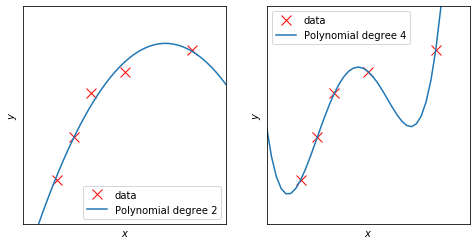

In [5]:
# Draw some data
x_fit = np.linspace(0, 7)
X2_fit = np.concatenate([np.array([x_fit**i]).T for i in range(3)], axis=1)
X4_fit = np.concatenate([np.array([x_fit**i]).T for i in range(5)], axis=1)
y2 = X2_fit.dot(theta2)
y4 = X4_fit.dot(theta4)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y, 'rx', ms=10, label='data')
plt.plot(x_fit, y2, label='Polynomial degree 2')
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 6, 0, 5])
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(x, y, 'rx', ms=10, label='data')
plt.plot(x_fit, y4, label='Polynomial degree 4')
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 6, 0, 5])
plt.legend(loc='best')

... A perfect fit may not be a good hypothesis, actually.

This type of overfit hypothesis will fail to generalize over new examples.

The standard way to evaluate a learned hypothesis is as follows:

1. Suppose we have the following dataset, with 10 training examples:

| Size | Price |
| ---- | ----- |
| 2104 | 400   |
| 1600 | 330   |
| 2400 | 369   |
| 1416 | 232   |
| 3000 | 540   |
| 1985 | 300   |
| 1534 | 315   |
| 1427 | 199   |
| 1380 | 212   |
| 1494 | 243   |

2. We split this dataset as follows:
   - We assume the dataset is shuffled (if not, shuffle it first).
   - 70% (80%) is left as **training set** $\{(x^{(1)}, y^{(1)}), \dots, (x^{(m)}, y^{(m)})\}$.
   
| Size | Price |
| ---- | ----- |
| 2104 | 400   |
| 1600 | 330   |
| 2400 | 369   |
| 1416 | 232   |
| 3000 | 540   |
| 1985 | 300   |
| 1534 | 315   |

   - The rest 30% (20%) is the **test set** $\{(x_{test}^{(1)}, y_{test}^{(1)}), \dots, (x_{test}^{(m_{test})}, y^{(m_{test})})\}$.
   
| Size | Price |
| ---- | ----- |
| 1427 | 199   |
| 1380 | 212   |
| 1494 | 243   |

3. With this:
   - We learn the parameters $\theta$ minimizing the cost function over the trainig set.
   - We compute the cost function over the test set:
     
     $$
     J_{test}(\theta) = \frac{1}{2m_{test}} \sum_{i=1}^{m_{test}}(h_{\theta}(x_{test}^{(i)}) - y_{test}^{(i)}),
     $$
     
     for the linear regression, or,
     
     $$
     J_{test}(\theta) = -\frac{1}{m_{test}} \sum_{i=1}^{m_{test}}y_{test}^{(i)}\log h_{\theta}(x_{test}^{(i)}) + (1 - y_{test}^{(i)})\log (1 - h_{\theta}(x_{test}^{(i)})),
     $$
     
     for the logistic regression.

Another metric we could use to evaluate the logistic regression is me misclassification error:

$$
err(h_{\theta}(x), y) = \left\{\begin{array}{ccc}
1 & \text{if} & h_{\theta}(x)\geq 0.5 \text{ and } y=0 \text{, or } h_{\theta}(x)< 0.5 \text{ and } y=1 \\
0 & \text{otherwise} &
\end{array}\right.
$$

$$
error = \frac{1}{m_{test}} \sum_{i=1}^{m_{test}} err(h_{\theta}(x_{test}^{(i)}), y_{test}^{(i)})
$$

## 3. Model Selection: Train/Test/Validation Sets

As we saw in the overfit example, since the parameters are fit w.r.t. the training dataset, the cost function evaluated over the training dataset is likely to be lower than the cost function evaluated on unseen data instances.

In this sense, the cost function evaluated on the training set is not a good evaluation metric.

### Model selection

Let's assume that we have fitted a polynomials of order 1, 2, ..., 10 to some training dataset:

1. $h_{\theta}(x) = \theta_0 + \theta_1 x$
2. $h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2$
3. $h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$

...

10. $h_{\theta}(x) = \theta_0 + \theta_1 x + \dots + \theta_{10} x^{10}$

Then, one think we could do in order to decide which degree $d$ is the best, is to evaluate the cost function over the test dataset for each hypothesis:

1. $J_{test}(\Theta^{(1)})$
2. $J_{test}(\Theta^{(2)})$
3. $J_{test}(\Theta^{(3)})$

...

10. $J_{test}(\Theta^{(10)})$

Thus, if we select the degree of the polynomial $d$ according to these values, then our **hyperparameter** $d$ will fit to the test set. This is, it will be an optimistic estimate of the generalization error.

### Evaluating your hypothesis

In the sense of the above problem, what one can do is to split the example data into three sets:

- The training set: This is the set which will be used to learn the model parameters $\Theta$. $\{(x^{(1)}, y^{(1)}), \dots, (x^{(m)}, y^{(m)})\}$
- The validation set: This is the set which will be used to learn the model hyperparameters (such as $d$, in the above example). $\{(x_{cv}^{(1)}, y_{cv}^{(1)}), \dots, (x_{cv}^{(m_{cv})}, y_{cv}^{(m_{cv})})\}$
- The test set: This set is to be used to evaluate the model only. $\{(x_{test}^{(1)}, y_{test}^{(1)}), \dots, (x_{test}^{(m_{test})}, y_{test}^{(m_{test})})\}$

Thus, instead of using the test set to select the hyperparameter(s) of a model, we should use the validation dataset.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez. Based on the content of the Machine Learning course offered through coursera by Prof. Andrew Ng.
</footer>